In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Loading and Exploratory Data Analysis

In [3]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

data.isnull().sum()

## what would you do if you have null values?

In [6]:
data.drop("Invoice ID", axis=1,inplace=True)

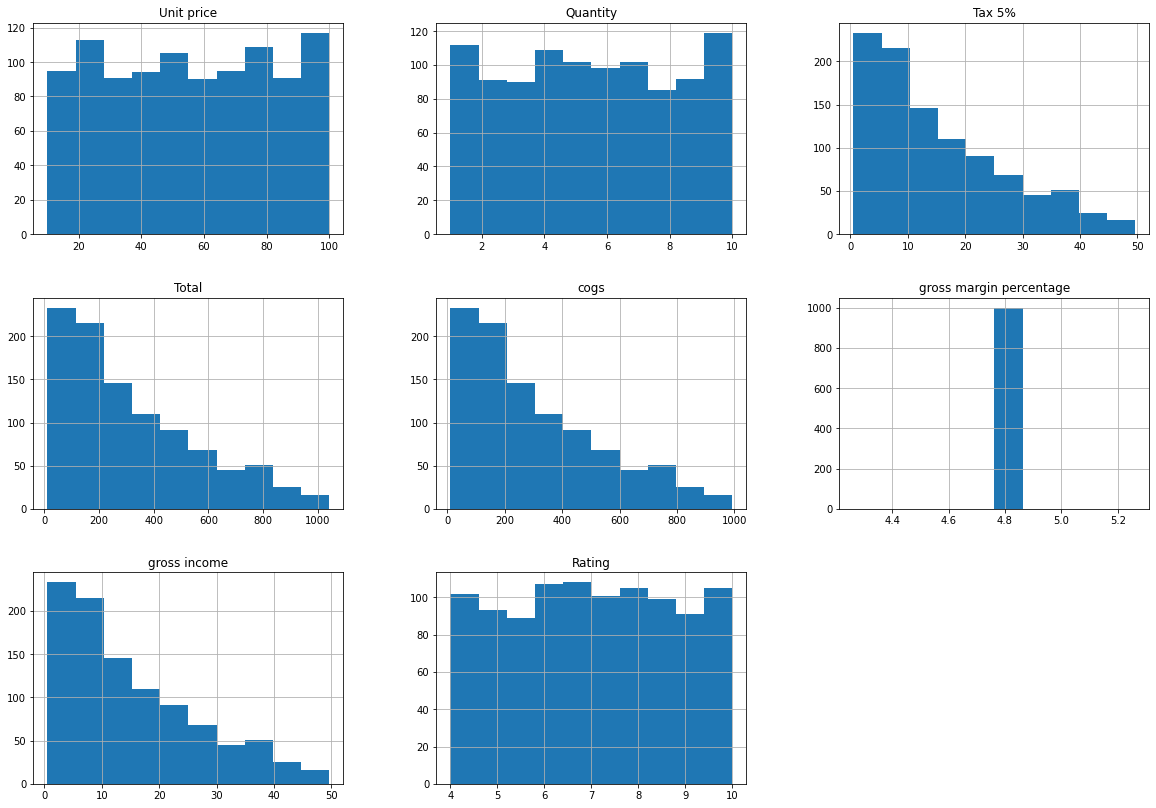

In [7]:
data.hist(figsize=(20,14))
plt.show()

<AxesSubplot:>

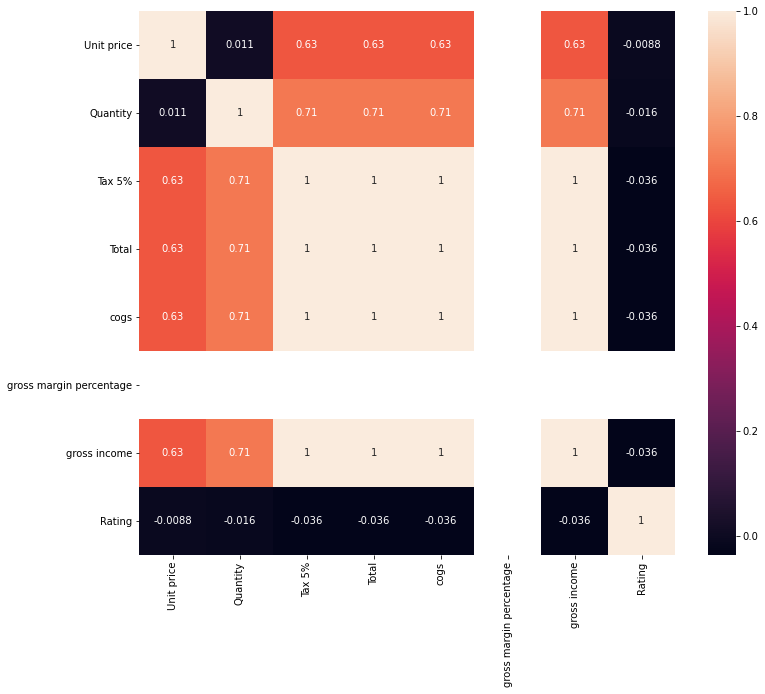

In [8]:
data.corr()
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

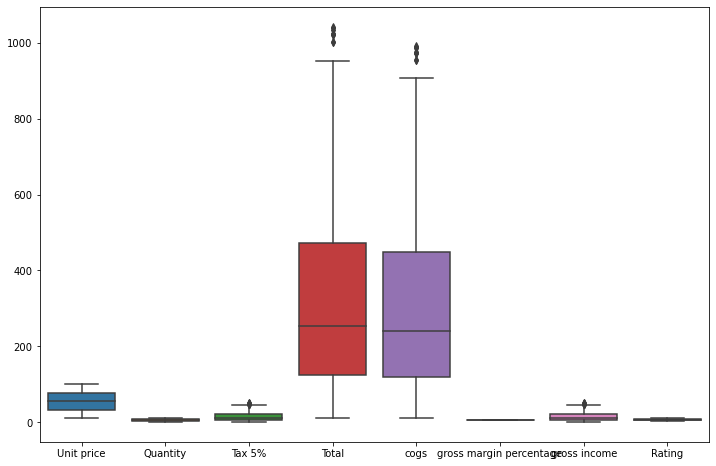

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data);

In [10]:
def Outliers(col):
    Median = data[col].quantile(0.50)
    Max = data[col].quantile(0.95)
    data[col] = np.where(data[col]>Max, Median,data[col])
    return data[col]

In [11]:
Outliers("Total")
Outliers("cogs")
Outliers("Tax 5%")
Outliers("gross income")

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    12.0880
997     1.5920
998     3.2910
999    30.9190
Name: gross income, Length: 1000, dtype: float64

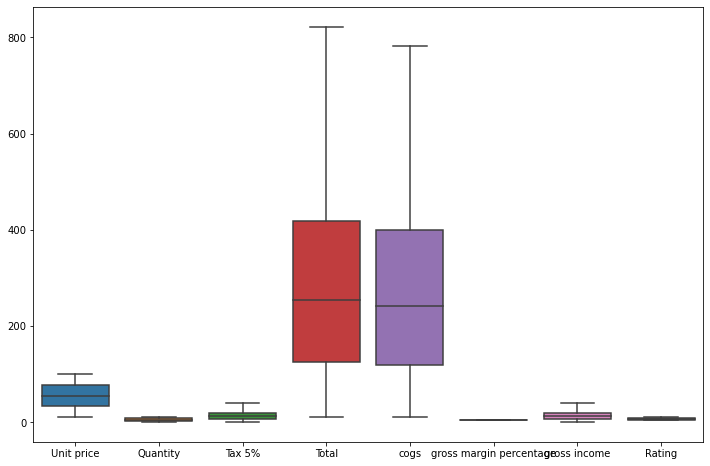

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data);

## At this point, below are some of the questions I like to ask,
    1.can we build a model to predict the gender?
    2.sales forecasting
    3.predicting the ratings

In [13]:
#drop invoice ID
# gross margin perntage since there is no correlation
# use either tax 5% or gross income since there are looking very similar and similar dis. also to reduce the reduncy
# also can drop either total or cogs for the same reason
data.drop(['gross margin percentage','Tax 5%','cogs'],axis=1,inplace=True)

In [14]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,253.8480,3/2/2019,17:16,Ewallet,12.0880,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,3.2910,4.1


In [15]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

## writing a class to pick a best model

In [16]:
class DataPreprocessing:
    #constructor to open the file
    def __init__(self,data):
        self.data = data
    # data preprocessing
    def preprocessing(self):
        list_1=list(self.data.columns)
        list_cate=[]
        #seperate out columns with non numerical values
        for i in list_1:
            if self.data[i].dtype=='object':
                list_cate.append(i)
        #turning categorical data to numerical data
        le=LabelEncoder()
        for i in list_cate:
            self.data[i]=le.fit_transform(self.data[i])
        y=self.data['Gender']
        x=self.data.drop('Gender',axis=1)
        return x,y
    # train test split
    def data_spliting(self):
        x,y = self.preprocessing()
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
        return x_train,x_test,y_train,y_test
        
        

In [17]:
class ModelTesting:
    def __init__(self,model):
        self.model = model
        self.model_name = str(model)[0:str(model).index("(")]
    def prediction(self):
        x_train,x_test,y_train,y_test = DataPreprocessing(data).data_spliting()
        self.model.fit(x_train, y_train)
        y_pred = self.model.predict(x_test)
        print("Classification Report of "+self.model_name+" is:\n",classification_report(y_test,y_pred))
        print("Confusion Matrix of "+self.model_name+" :\n",confusion_matrix(y_test,y_pred))
        print("Training Score of "+self.model_name+" :\n",self.model.score(x_test,y_test)*100)

In [18]:
file_name = "supermarket_sales - Sheet1.csv"
svc = SVC()
knn=KNeighborsClassifier(n_neighbors=7)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
rfc=RandomForestClassifier()
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
gbc=GradientBoostingClassifier()

In [19]:
model_list = [svc,knn,gnb,dtree,rfc,xgb,gbc]

In [20]:
for model in model_list:
    m = ModelTesting(model)
    m.prediction()

Classification Report of SVC is:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57       100
           1       0.53      0.43      0.48       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200

Confusion Matrix of SVC :
 [[62 38]
 [57 43]]
Training Score of SVC :
 52.5
Classification Report of KNeighborsClassifier is:
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       100
           1       0.47      0.43      0.45       100

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix of KNeighborsClassifier :
 [[52 48]
 [57 43]]
Training Score of KNeighborsClassifier :
 47.5
Classification Report of GaussianNB is:
               precision    recall 

## Further studies
 1. Need to pick and choose a model to fine tune it.
 2. principal component analysis.
 